# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2023-24 учебный год

### Домашнее задание №2. Математическая оптимизация

Задание выполнил(а):
Барздо Олег

### Общая информация

__Дата выдачи:__ 11.06.2024

__Дедлайн:__ 04:00 18.06.2024

### Оценивание и штрафы

Количество баллов за каждую задачу данного домашнего задания указано рядом с условием задачи.

Оценка за домашнее задание вычисляется по следующей формуле:

$$
s \times 10/34 ,
$$

где $s$  — количество баллов, которое вы набрали в сумме по всем задачам.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

**Важно:** В этом домашнем задании предусмотрено несколько заданий, за которые можно получить бонусные баллы. Бонусные баллы прибавляются к обычным баллам, и может выйти так, что ваша итоговая оценка станет больше 10. В таком случае именно это и будет являться вашей оценкой. То есть за это ДЗ **можно** получить больше 10

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

Кроме того, не забывайте, что все решения прогоняются через специальную новую систему антиплагиата для юпитеровских ноутбуков, которая детектирует перекрестные «похожести» между разными ноутбуками, а также решения, сгенерированные нейросетью. Подобные работы также в обязательном порядке будут расцениваться исключительно как плагиат.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе — указан для каждой группы в нашем телеграмм-канале.

### О задании

В данном задании мы потренируемся в работе с математическим анализом и методами математической оптимизации, чёткое понимание которых совершенно необходимо в рамках любой задачи и для любой модели в машинном обучении.

В первой части задания мы будем с вами работать со следующей функцией:

$$y(x) = x^{3} \ln(x)$$

### Задание 1


#### 1.1. (1 балл)

Посчитайте производную данной функции аналитически. Для этого либо воспользуйтесь листком бумаги и прикрепите сюда фотографию, либо используйте язык разметки LaTeX — он поддерживается в юпитеровских ноутбуках.

$$y'(x) = 3x^{2} * \ln(x) + x^{3} * (\frac{1}{x})$$  
$$y'(x) = 3x^{2} * \ln(x) + x^{2}$$  
$$y'(x) = x^{2}* (3 * \ln(x) + 1)$$

#### 1.2. (2 балла)

Напишите программную функцию `f(x)`, которая бы вычисляла значение нашей функции в точке и возвращала бы это значение в качестве ответа; и напишите программную функцию `df(x)`, которая бы вычисляла значение производной нашей функции в точке и возвращала бы это значение в качестве ответа.

Обязательно сделайте проверку всех функций на какой-нибудь конкретной точке. Убедитесь, что ответы вашего предыдущего пункта (на листочке) и программного в этом плане полностью совпадают.

Напишем сначала сами функции:

In [266]:
import math


def func(x : float) -> float:
    return x**3 * math.log(x)


def dfunc(x : float) -> float:
    return 3*(x**2)*math.log(x) + x**2

Проверм наши функции на реальных числах:

In [9]:
x = [1, 2, 5] #Задаем точки, которые хотим проверить
expected_value = [0, 5.54518, 201.17974] #Это будут значения f(x), которые высчитаны вручную
expected_value_df = [1, 12.31777, 145.70784] #Это будут значени df(x), которые высчитаны вручную
for i in range (len(x)):
    y = round(func(x[i]), 5)
    dy = round(dfunc(x[i]), 5)
    print(y == expected_value[i])
    print(dy == expected_value_df[i])

True
True
True
True
True
True


Как мы видим, что все значения совпали, то есть мои функции работают корректно!

#### 1.3. (2 балла)

Визуализируйте нашу функцию (постройте график).

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
#Зададим значения
x = np.linspace(0.1, 10, 100)
func_x = [func(x) for x in x]
dfunc_x = [dfunc(x) for x in x]

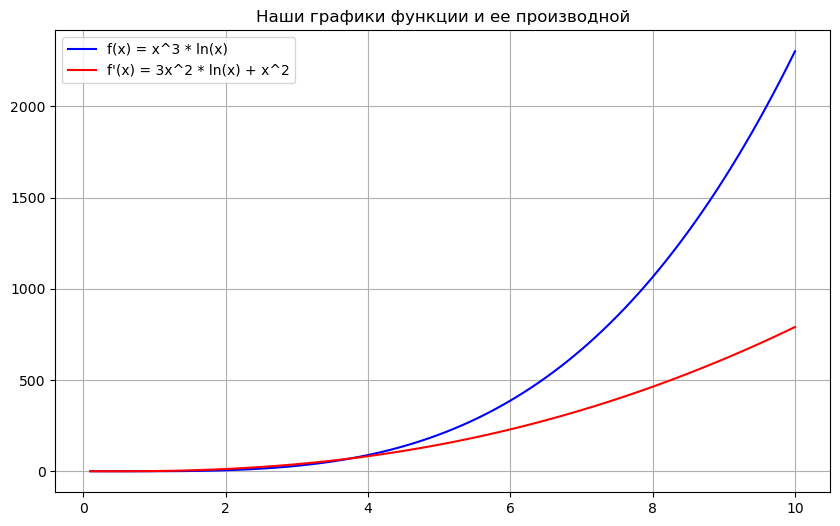

In [25]:
# Создаем графики
plt.figure(figsize=(10, 6))
plt.plot(x, func_x, label='f(x) = x^3 * ln(x)', color='blue')
plt.plot(x, dfunc_x, label="f'(x) = 3x^2 * ln(x) + x^2", color='red')
plt.title('Наши графики функции и ее производной')
plt.legend()
plt.grid(True)
plt.show()

### Задание 2

#### 2.1. (4 балла)

Реализуйте функцию `get_min_with_gd`, которая принимает на вход начальную точку $x_0$, число шагов, `lr` и `threshold`; внутри себя производит поиск минимума при помощи градиентного спуска; и возвращает последовательность точек, полученных на каждом шаге.

Добавим в наш градиетный спуск проверку на x<=0, так как ln(x) можно взять только при x > 0, в общем случае мы можем убрать это. В целом это можно и сделать, подобрав лучше наши гиперпараметры, но я лучше выведу сообщение на экран, чтобы человек понимал в чем ошибка и лучше подобрал гиперпараметры

In [258]:
#Все таки хочется вместо threshold брать tolerance, т.к это более общепринятое обозначение
def get_min_with_gd(x0, max_iter, lr, tol):
    points = []
    x = x0
    iteration = 0
    points.append([iteration, x])
    dfdx = dfunc(x)
    while iteration < max_iter and np.abs(dfdx) > tol:
        dfdx = dfunc(x)
        x = x - lr * dfdx
        if x <= 0:
            print('Gd is out of range (<0)')
            break
        iteration += 1
        points.append([iteration, x])
        plot_line_with_x(xs, ys, x, func(x), msg = f'iteration_number: {iteration}', title = 'Dynamic 1d')
    return points

#### 2.2. (2 балла)

Запустите поиск минимума с нескольких любых точек (не менее 3).

Проверьте, что все работает ожидаемым образом, отрисовав график изменения координаты точки, в зависимости от итерации градиентного спуска, для каждого запуска.

In [86]:
import time
from IPython.display import clear_output

Сначала обратим внимание, что мы работаем с логарифмом и наш график определен на промежутке (0; +inf), то есть мы не можем задать точку меньше нуля стартовую

In [149]:
def plot_line_with_x(xs: list, ys: list, x: float, fx: float, title: str, msg='', figsize=(15, 5)):    
    clear_output(True)
    plt.figure(figsize=figsize)
    plt.plot(xs, ys, 'b')
    plt.scatter([x], [fx], c='r', marker='x', s=120)
    plt.title(title)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.text(s=msg, x=-2, y=103)
    plt.show()

In [88]:
xs = np.linspace(0.1, 10, 100)
ys = [func(x) for x in xs]

#### 1-ая точка

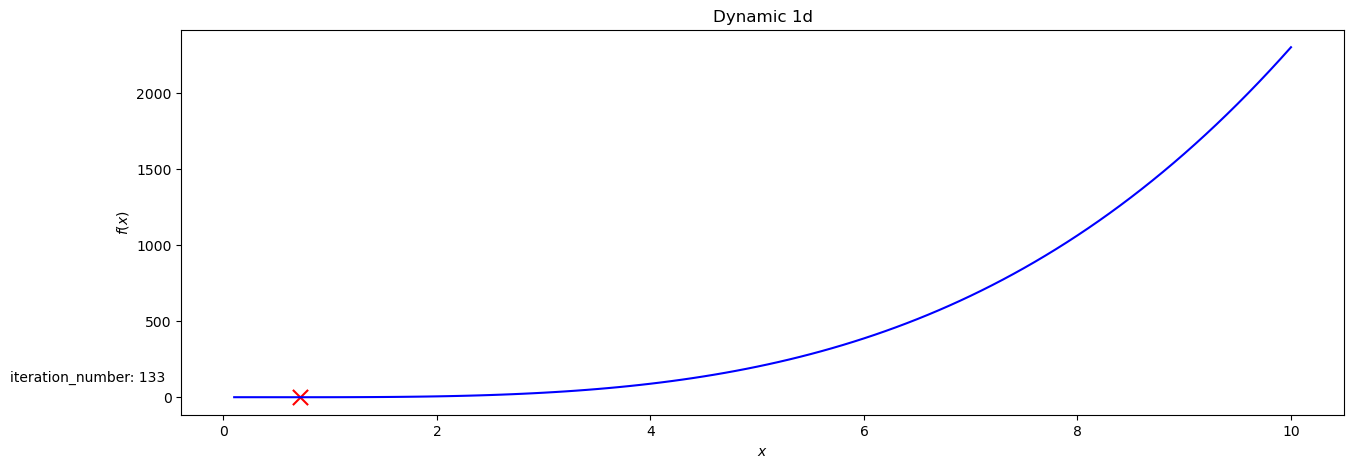

In [97]:
#Этот график работает динамически при запуске, т.е запускаешь его и он последовательно передвегает крестик по точкам
array_1 = get_min_with_gd(2, 200, 0.03, 1e-4)
#Можно проверить, если интересно

#### 2-ая точка

Тут берем lr меньше, чтобы не выйти за границу 0 и дадим чуть больше итераций

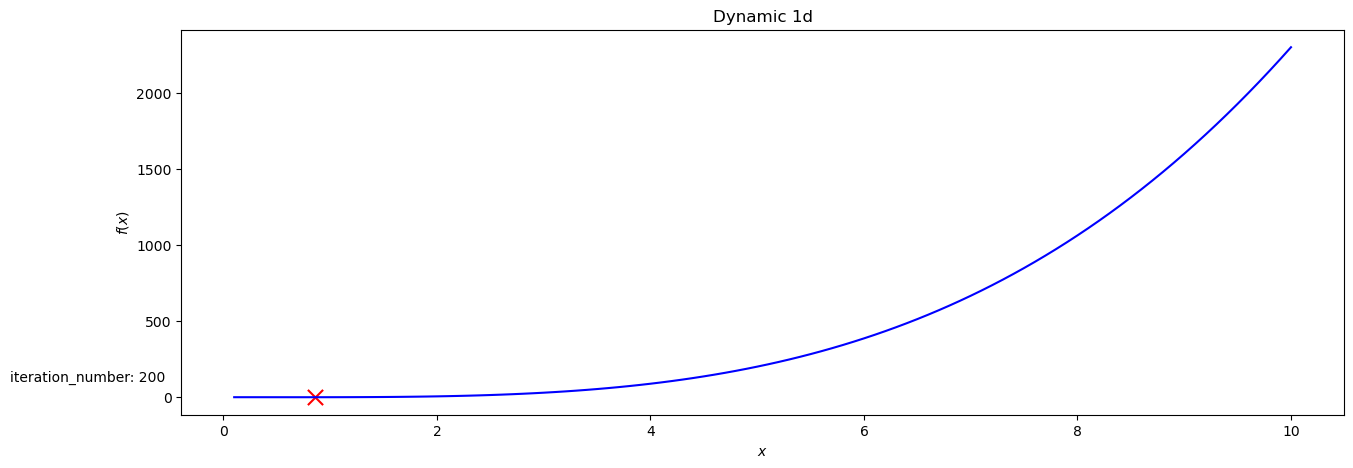

In [151]:
array_2 = get_min_with_gd(20, 200, 0.003, 1e-4) #Все тоже работает в динамике, можно запустить ячейки

#### 3-я точка

Берем старт слева и смотрим, что будет

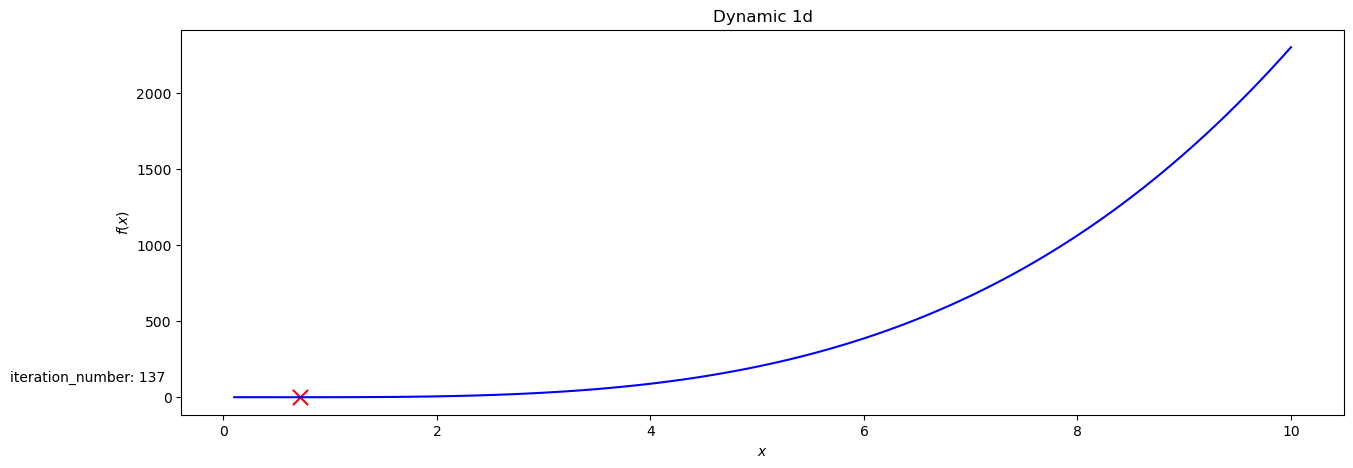

In [100]:
array_3 = get_min_with_gd(0.5, 200, 0.03, 1e-4) #Все работает в динамике, можно запустить ячейки

Посмотрим на результаты

In [152]:
array_1[-1], array_2[-1], array_3[-1]

([133, 0.7165727305243762],
 [200, 0.8533051601199367],
 [137, 0.7164883454615811])

Как мы видим, делая lr слишком маленьким, то в конце не хватает даже и 300 итераций, чтобы дойти до истинного минимума (истинный минимум где-то в районе 0.716531)

#### 2.3. (3 балла)

Отрисуйте график самой функции еще раз. На данный график нанесите движение алгоритма от исходных точек к финальной точке разными цветами. Нанесите на график истинный минимум отдельной точкой и подпишите его (в виде текста на графике).

In [158]:
array_points = [array_1, array_2, array_3]
colors = ['red', 'green', 'yellow'] 
alphas = [1, 0.2, 1]

Красные точки плохо видно, они пропадают под зелеными, но в целом, под зелеными в конце видно, что появляются красные точки, желтым цветом - точки, когда мы идем слева к минимуму. Синяя точка - сам минимум

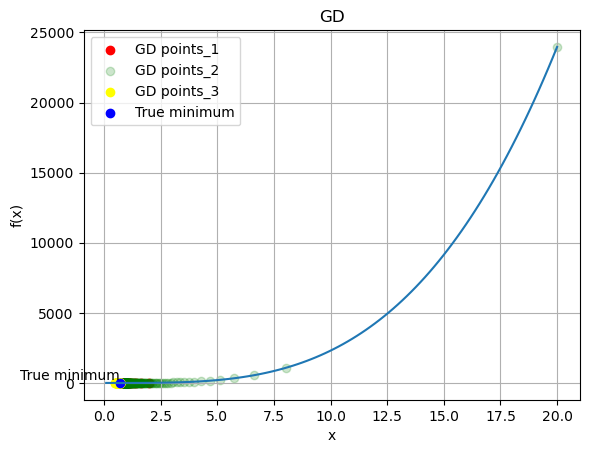

In [161]:
colour_iter = 0
x = np.linspace(0.1, 20, 100)
y = [func(x) for x in x]
plt.plot(x, y)
for points in array_points:
    iterations, x_points = zip(*points)
    y_points = [func(x) for x in x_points]
    plt.scatter(x_points, y_points, c=colors[colour_iter], label=f'GD points_{colour_iter+1}', alpha = alphas[colour_iter])
    colour_iter += 1
plt.scatter(0.716531, 0, c='blue', label='True minimum')
plt.text(0.716531, 0, 'True minimum', horizontalalignment='right', verticalalignment='bottom')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('GD')
plt.legend()
plt.grid(True)
plt.show()

### Задание 3

Начиная с задания 3, мы будем работать с другими функциями.

Пусть

$$f = \log((e^x + e^{-2x}) \cdot(e^{y + 1} + 0.5\cdot e ^{-y}))$$

#### 3.1. (1 балл и 2 бонусных балла)

Верно ли, что $f$ имеет единственную точку локального минимума, причем этот локальный минимум также является и глобальным? Почему да или почему нет? Докажите ваш ответ!

*Примечание. В данном задании графическое доказательство оценивается в 1 балл; строгое математическое доказательство оценивается в 2 бонусных балла.*

### Сюда прикладываю ссылку на математическое доказательство, скрины чет плохо поддерижваются юпитером

https://drive.google.com/file/d/18QZpRlep1n-Z5eCQ9NT-jDgFAT8ZAtn5/view?usp=sharing

In [185]:
from mpl_toolkits.mplot3d import Axes3D

In [267]:
def func2(x, y):
    return np.log((np.exp(x) + np.exp(-2*x)) * (np.exp(y + 1) + 0.5 * np.exp(-y)))

In [273]:
def dfunc2(x):
    dfdx = (np.exp(x[0])-2*np.exp(-2*x[0]))/(np.exp(x[0]) + np.exp(-2*x[0]))
    dfdy = (np.exp(x[1]+1) - 0.5 * np.exp(-x[1])) / (np.exp(x[1]+1) + 0.5 * np.exp(-x[1]))
    return (np.array([dfdx, dfdy]))

Сначала давайте построим на минимумы функции графически

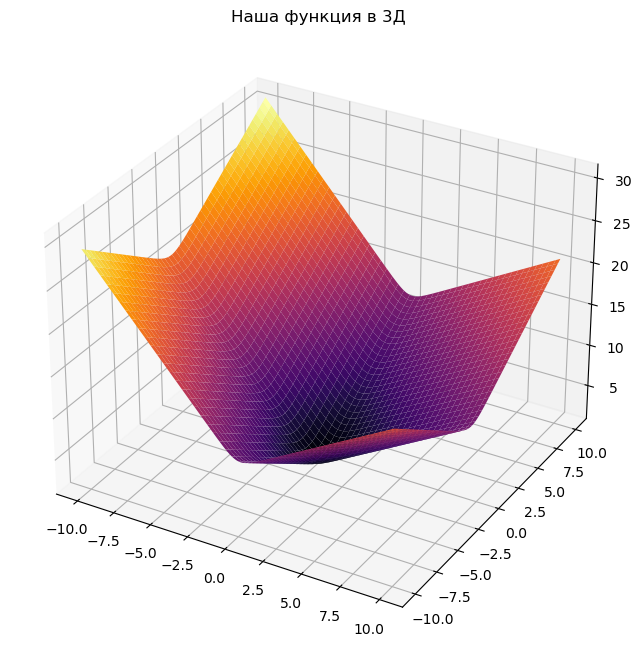

In [269]:
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y) #Делаем сетку всевозможнных значений X, Y
Z = func2(X, Y)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')
ax.set_title('Наша функция в 3Д')
plt.show()

Как мы видим у нас есть подозрение на минимум, давайте повернем нашу функцию, чтобы убедиться в этом

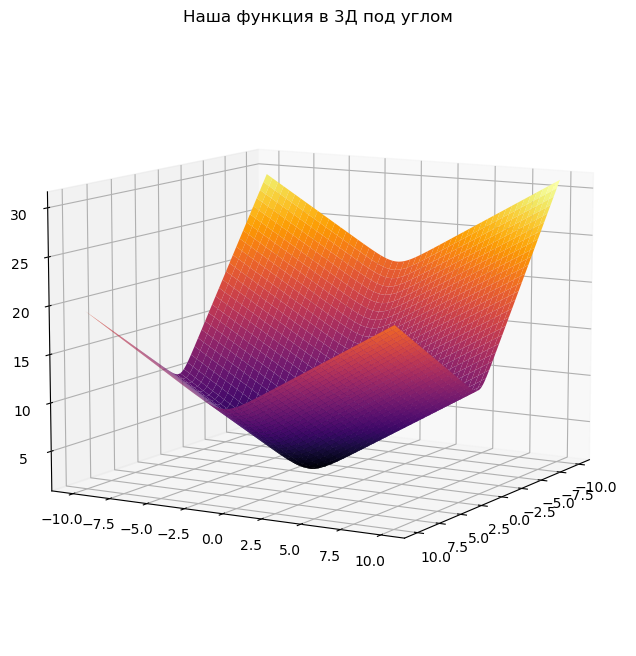

In [270]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='inferno')
ax.set_title('Наша функция в 3Д под углом')
#Установим другой угол
ax.view_init(elev=10, azim=30) 
plt.show()

#### Вывод:

Как мы видим - минимум и впарвду есть и он явно является глобальным, а не локальным, т.к это некая порабола в 3Д, которая имеет дно, которая и является единсвтенным минимумом, по координатам приблизительно (-2; -2; 1). Теперь нужно проверить это математически, давайте же перейдем к доказательству

#### 3.2. (3 балла и 2 бонусных балла)

Придумайте какие-нибудь функции $g$ и $h$ от двух переменных, такие что
- функция $g$ не имеет глобального минимума (не ограничена снизу);
- функция $h$ имеет по крайней мере два локальных минимума, неравных друг другу.

Докажите, что ваши функции удовлетворяют заявленным критериям.

*Примечание. В данном задании графическое доказательство оценивается в рамках основных баллов; строгое математическое доказательство оценивается в 2 бонусных балла.*

In [271]:
def func_g(x, y):
    return (-(x**2 + y**2)**0.5)

In [305]:
def dfunc_g(x):
    dfdx = -x[0] / np.sqrt(x[0]**2 + x[1]**2)
    dfdy = -x[1] / np.sqrt(x[0]**2 + x[1]**2)
    return np.array([dfdx, dfdy])

#### Мат обоснование:

Тут в принципе все одовольно очевидно, у нас подкоренное выражение всегда положительно, так как под ним квадраты => оно всегда растет, следовательно значение корня всегда растет, пишем знак минус и тогда наша функция бесконечно убывает)

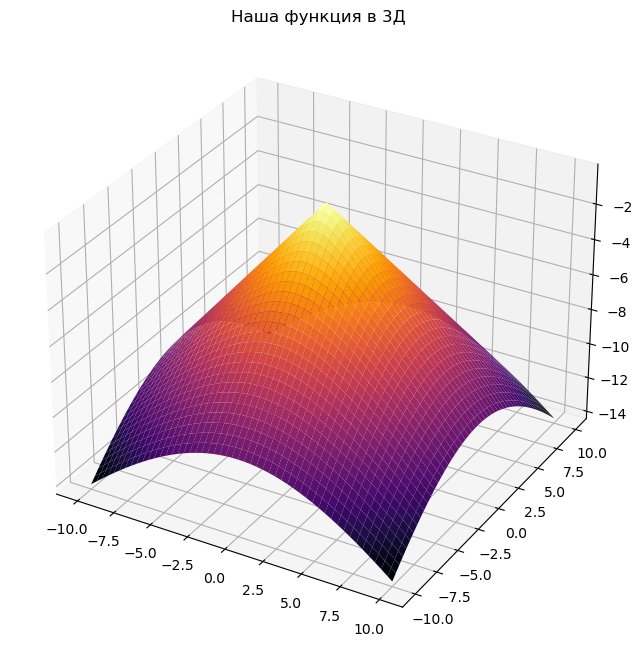

In [272]:
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y) #Делаем сетку всевозможнных значений X, Y
Z = func_g(X, Y)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')
ax.set_title('Наша функция в 3Д')
plt.show()

Тут впринципе понятно, что наша функция будет бесконечно убывать, т.к при увелечении или уменьшии x и y наша функция будет стремится к -inf, что видно собственно и на графике

In [388]:
def func_h(x, y):
    return ((8 * x**4 - 8 * x**2 + 1) + (16 * y**4 - 12 * y**2 + 1))/np.sin(x)

def dfunc_h(x):
    dfdx = (np.sin(x[0]) * (32 * x[0]**3 - 16 * x[0]) - ((8 * x[0]**4 - 8 * x[0]**2 + 1) + (16 * x[1]**4 - 12 * x[1]**2 + 1)) * np.cos(x[0])) / (np.sin(x[0])**2)
    dfdy = (64 * x[1]**3 - 24 * x[1]) / np.sin(x[0])
    return np.array([dfdx, dfdy])


Тут доказывать не будем, только посмотрим

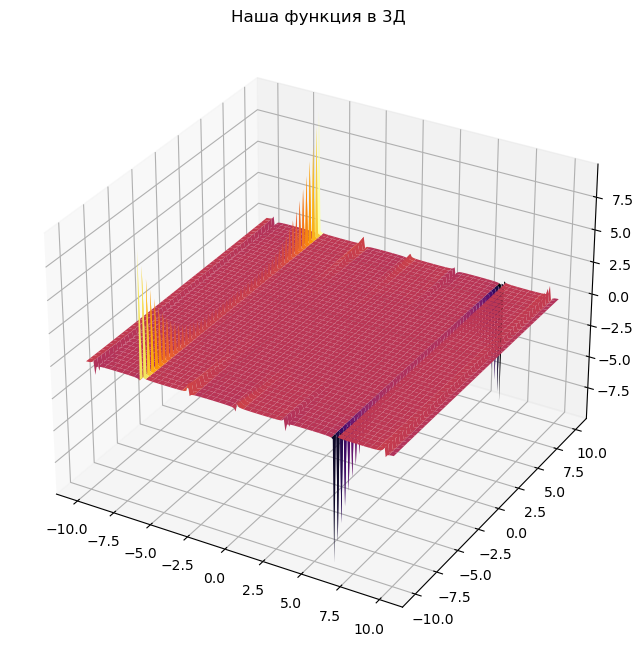

In [386]:
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y) #Делаем сетку всевозможнных значений X, Y
Z = func_h(X, Y)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')
ax.set_title('Наша функция в 3Д')
plt.show()

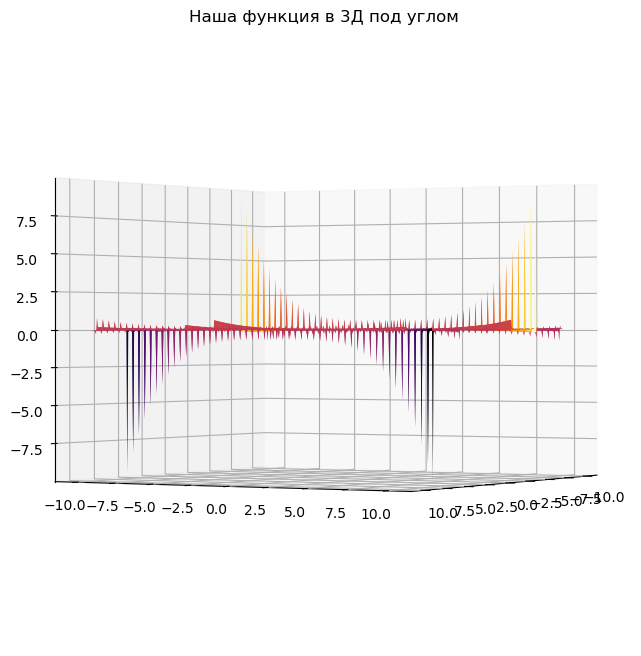

In [387]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='inferno')
ax.set_title('Наша функция в 3Д под углом')
#Установим другой угол
ax.view_init(elev=0, azim=30) 
plt.show()

Как мы видим наша функция явно имеет как минимум два разных минимума, что нам и нужно 

#### 3.3. (5 баллов)

Реализуйте функцию `get_min_with_rmsprop`, которая принимает на вход начальную точку $x_0$, число шагов, `lr`, `beta` и `threshold`; внутри себя производит поиск минимума при помощи градиентного спуска с модификацией RMSProp; и возвращает последовательность точек, полученных на каждом шаге.

Напомним, как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ — learning rate, $ɛ$ — малое число (можно взять 0.0001 — оно нужно, чтобы случайно не было деления на 0), $\beta$ — мера учета инерции.



Напишем сначала его для нашей функции f от одной переменной

In [260]:
def get_min_with_rmsprop_dfunc_1(x0, max_iter, lr, beta, tol):
    gamma = 0
    epsilon = 0.0001
    points = []
    x = x0
    iteration = 0
    points.append([iteration, x])
    dfdx = dfunc(x)
    while iteration < max_iter and np.abs(dfdx) > tol:
        gamma = (1-beta) * gamma + beta * dfunc(x)**2
        x = x - alpha / np.sqrt(gamma + epsilon) * dfunc(x)
        iteration += 1
        points.append([iteration, x])
    return points

Теперь напишем для неограниченного числа переменных (в нашем случае двух). Также мы будем передавать нашу функцию производный, чтобы не расписывать 3 отдельных случая.

In [279]:
def get_min_with_rmsprop(x0, max_iter, beta, lr, tol, dfunc):
    gamma = np.zeros_like(x0)
    epsilon = 0.0001
    points = []
    x = x0
    iteration = 0
    points.append((iteration, x.copy()))
    dfdx = dfunc(x)
    while iteration < max_iter and np.linalg.norm(dfdx) > tol:
        dfdx = dfunc(x)
        gamma = (1 - beta) * (dfdx ** 2) + beta * gamma
        x = x - (lr / (np.sqrt(gamma) + epsilon)) * dfdx
        points.append((iteration, x.copy()))
        iteration += 1
    return points

Проверим вообще нашу функцию

In [389]:
x0 = np.array([2.0, 5.0])
max_iter = 1000
lr = 0.03
beta = 0.01
tol = 1e-4
result_1_f = get_min_with_rmsprop(x0, max_iter, lr, beta, tol, dfunc2)
for iteration, point in result_1_f:
    print(f"Iteration {iteration}: x = {point}")

Iteration 0: x = [2. 5.]
Iteration 0: x = [1.98984758 4.98984757]
Iteration 1: x = [1.97984415 4.97984407]
Iteration 2: x = [1.96984509 4.96984493]
Iteration 3: x = [1.95984617 4.95984593]
Iteration 4: x = [1.94984726 4.94984693]
Iteration 5: x = [1.93984835 4.93984793]
Iteration 6: x = [1.92984944 4.92984893]
Iteration 7: x = [1.91985053 4.91984993]
Iteration 8: x = [1.90985163 4.90985093]
Iteration 9: x = [1.89985272 4.89985193]
Iteration 10: x = [1.88985383 4.88985293]
Iteration 11: x = [1.87985493 4.87985393]
Iteration 12: x = [1.86985604 4.86985493]
Iteration 13: x = [1.85985715 4.85985593]
Iteration 14: x = [1.84985827 4.84985693]
Iteration 15: x = [1.83985939 4.83985793]
Iteration 16: x = [1.82986051 4.82985893]
Iteration 17: x = [1.81986163 4.81985993]
Iteration 18: x = [1.80986276 4.80986093]
Iteration 19: x = [1.7998639  4.79986193]
Iteration 20: x = [1.78986504 4.78986293]
Iteration 21: x = [1.77986618 4.77986393]
Iteration 22: x = [1.76986732 4.76986493]
Iteration 23: x = [

Вроде получаем +- правильные значения, как получали аналитически, то есть наша функция работает более менее верно

Проверим на нашей функции у которой неограниченный минимум:

In [331]:
x0 = np.array([2.0, 5.0])
max_iter = 1000
lr = 0.03
beta = 0.01
tol = 1e-4
result_1_g = get_min_with_rmsprop(x0, max_iter, lr, beta, tol, dfunc_g)
for iteration, point in result_1_g:
    print(f"Iteration {iteration}: x = {point}")

Iteration 0: x = [2. 5.]
Iteration 0: x = [2.01015069 5.01015235]
Iteration 1: x = [2.02015326 5.02015565]
Iteration 2: x = [2.03015151 5.03015458]
Iteration 3: x = [2.04014962 5.04015338]
Iteration 4: x = [2.05014773 5.05015218]
Iteration 5: x = [2.06014584 5.06015097]
Iteration 6: x = [2.07014396 5.07014976]
Iteration 7: x = [2.08014207 5.08014856]
Iteration 8: x = [2.09014018 5.09014735]
Iteration 9: x = [2.1001383  5.10014614]
Iteration 10: x = [2.11013641 5.11014494]
Iteration 11: x = [2.12013453 5.12014373]
Iteration 12: x = [2.13013265 5.13014252]
Iteration 13: x = [2.14013077 5.14014131]
Iteration 14: x = [2.15012888 5.15014011]
Iteration 15: x = [2.160127  5.1601389]
Iteration 16: x = [2.17012512 5.17013769]
Iteration 17: x = [2.18012324 5.18013648]
Iteration 18: x = [2.19012137 5.19013527]
Iteration 19: x = [2.20011949 5.20013406]
Iteration 20: x = [2.21011761 5.21013286]
Iteration 21: x = [2.22011573 5.22013165]
Iteration 22: x = [2.23011386 5.23013044]
Iteration 23: x = [2.

Ну в целом - да, видим, что мы потихоньку увеличиваем наши x и y, но никак к минимум прийти не можем, в целом позитивный результат

In [390]:
x0 = np.array([2.0, 2.0])
max_iter = 1000
lr = 0.03
beta = 0.01
tol = 1e-4
result_1_h = get_min_with_rmsprop(x0, max_iter, lr, beta, tol, dfunc_h)
for iteration, point in result_1_h:
    print(f"Iteration {iteration}: x = {point}")

Iteration 0: x = [2. 2.]
Iteration 0: x = [1.98984654 1.98984654]
Iteration 1: x = [1.97985227 1.97984826]
Iteration 2: x = [1.96986279 1.9698546 ]
Iteration 3: x = [1.95987344 1.95986109]
Iteration 4: x = [1.94988406 1.94986756]
Iteration 5: x = [1.93989467 1.93987404]
Iteration 6: x = [1.92990525 1.9298805 ]
Iteration 7: x = [1.91991582 1.91988696]
Iteration 8: x = [1.90992636 1.90989342]
Iteration 9: x = [1.89993689 1.89989987]
Iteration 10: x = [1.88994739 1.88990632]
Iteration 11: x = [1.87995789 1.87991277]
Iteration 12: x = [1.86996836 1.86991921]
Iteration 13: x = [1.85997882 1.85992566]
Iteration 14: x = [1.84998926 1.8499321 ]
Iteration 15: x = [1.8399997  1.83993855]
Iteration 16: x = [1.83001011 1.82994499]
Iteration 17: x = [1.82002052 1.81995144]
Iteration 18: x = [1.81003092 1.80995789]
Iteration 19: x = [1.8000413  1.79996434]
Iteration 20: x = [1.79005168 1.78997079]
Iteration 21: x = [1.78006204 1.77997725]
Iteration 22: x = [1.7700724  1.76998372]
Iteration 23: x = [

Вроде как все гуд, приходим в один из наших минимумов

#### 3.4. (4 балла)

Запустите поиск минимума для всех трёх функций ($f$, $g$, $h$) с нескольких любых точек (не менее 3 — таким образом, минимум 9 запусков).

Проверьте, что все работает ожидаемым образом, отрисовав для каждого запуска график изменения координат точки (2D-график) по мере прохождения градиентного спуск. Все графики строятся на трёх парах осей, размещенных вертикально на одном полотне (свои оси для каждой функции; разные запуски для одной функции изображаются на одних осях).

Летсссс гоу строить графики

In [392]:
x0 = np.array([-5.0, -2.0])
max_iter = 1000
lr = 0.03
beta = 0.01
tol = 1e-4
result_2_f = get_min_with_rmsprop(x0, max_iter, lr, beta, tol, dfunc2)
result_2_g = get_min_with_rmsprop(x0, max_iter, lr, beta, tol, dfunc_g)
result_2_h = get_min_with_rmsprop(x0, max_iter, lr, beta, tol, dfunc_h)                      

In [393]:
x0 = np.array([0.01, 0.01])
max_iter = 1000
lr = 0.03
beta = 0.01
tol = 1e-4
result_3_f = get_min_with_rmsprop(x0, max_iter, lr, beta, tol, dfunc2)
result_3_g = get_min_with_rmsprop(x0, max_iter, lr, beta, tol, dfunc_g)
result_3_h = get_min_with_rmsprop(x0, max_iter, lr, beta, tol, dfunc_h) 

In [394]:
results_f = [result_1_f, result_2_f, result_3_f]
results_g = [result_1_g, result_2_g, result_3_g]
results_h = [result_1_h, result_2_h, result_3_h]

In [409]:
def plot_results(results_f, results_g, results_h, function_names):
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))
    for result in results_f:
        x_coords = [point[1][0] for point in result]
        y_coords = [point[1][1] for point in result]
        axes[0].plot(x_coords, y_coords, marker='o', label='Начальная точка:{}'.format(result[0][1]))
    axes[0].set_title(function_names[0])
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].legend()
    for result in results_g:
        x_coords = [point[1][0] for point in result]
        y_coords = [point[1][1] for point in result]
        axes[1].plot(x_coords, y_coords, marker='o', label='Начальная точка:{}'.format(result[0][1]))
    axes[1].set_title(function_names[1])
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].legend()
    for result in results_h:
        x_coords = [point[1][0] for point in result]
        y_coords = [point[1][1] for point in result]
        axes[2].plot(x_coords, y_coords, marker='o', label='Начальная точка:{}'.format(result[0][1]))
    axes[2].set_title(function_names[2])
    axes[2].set_xlabel('x')
    axes[2].set_ylabel('y')
    axes[2].legend()
    plt.tight_layout()
    plt.show()

In [412]:
function_names = ['f', 'g', 'h']

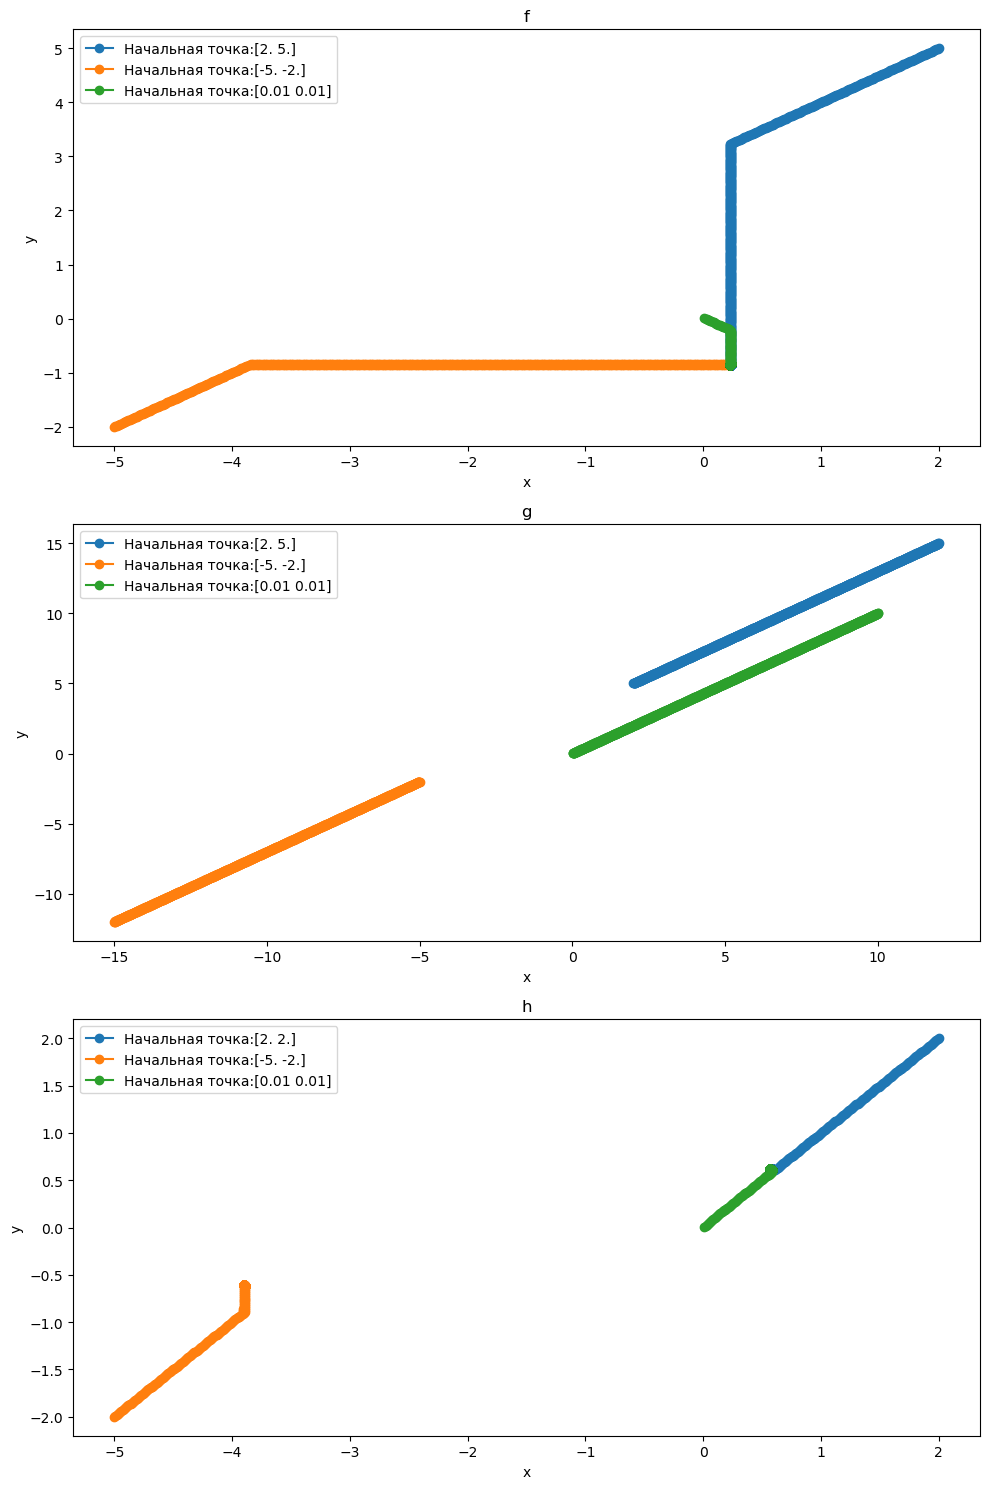

In [413]:
plot_results(results_f, results_g, results_h, function_names)

#### Вывод:  
В целом мы видим, то что и хотим, на первом графике все линии сходятся в одну точку - в наш истинный глобальный минимум  
На втором графике значенимя по x, y меняются, но минимума нет, что и следовало ожидать  
На третьем графике один минимум был найден, а второй минимум - неизвестно, но вроде как мы его нашли на позитиве

#### 3.5. (3 балла)

Отрисуйте графики самих функций еще раз. На данные графики нанесите движение алгоритма от исходных точек к финальной точке разными цветами. Там, где они есть у функции, нанесите на графики истинные локальные минимумы функций в виде отдельных точек, а также подпишите их в виде текста на графике. Все графики строятся на трёх множествах осей, размещенных вертикально на одном полотне — свои оси для каждой функции.

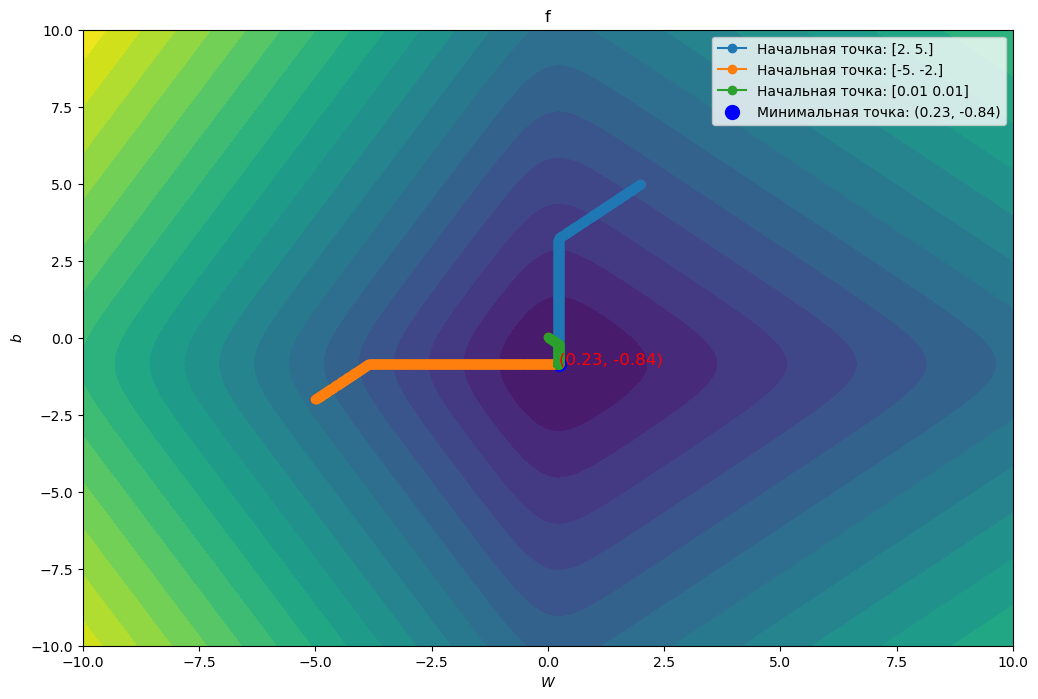

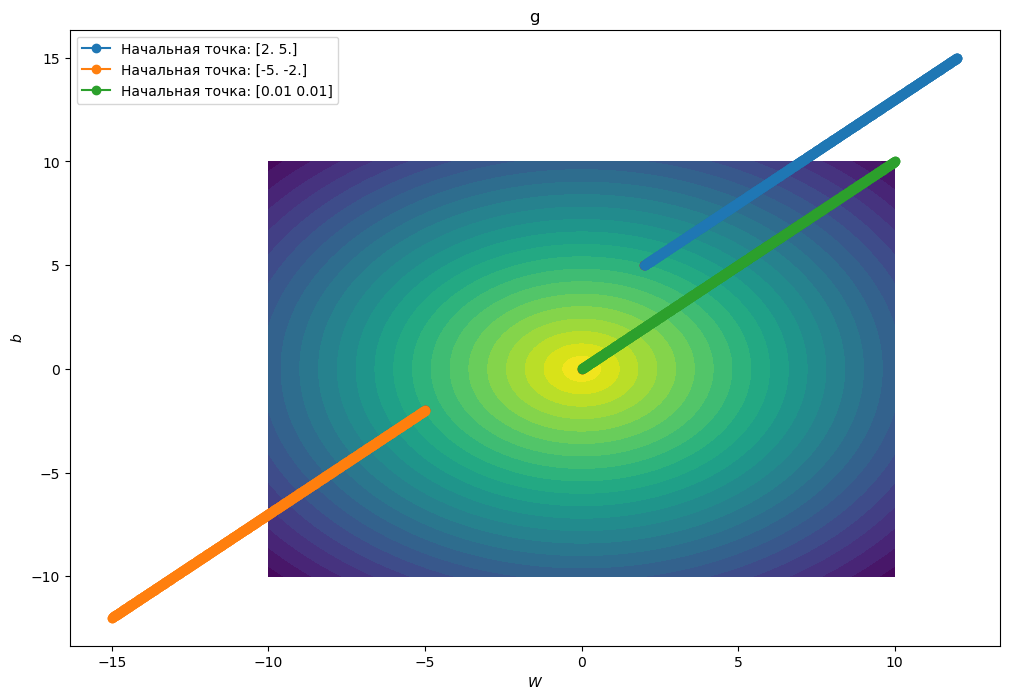

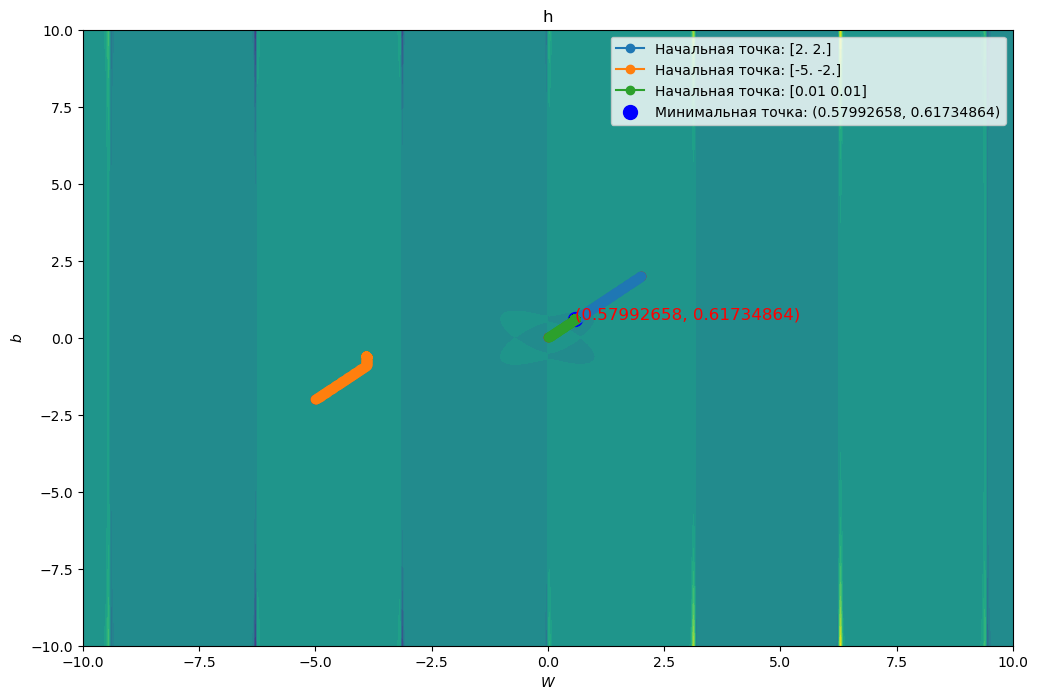

In [415]:
def plot_2d_function(W, B, J, title, paths, true_min, figsize=(12, 8)):    
    plt.figure(figsize=figsize)
    plt.contourf(W, B, J, levels=25)
    plt.title(title)
    plt.ylabel('$b$')
    plt.xlabel('$W$')
    for path in paths:
        x= [point[1][0] for point in path]
        y= [point[1][1] for point in path]
        plt.plot(x, y, marker='o', label=f'Начальная точка: {path[0][1]}')
        plt.scatter(x[0], y[0], color='red')
    if true_min is not None:
        for minimum in true_min:
            plt.scatter(minimum[0], minimum[1], color='blue', s=100, label=f'Минимальная точка: {minimum}')
            plt.text(minimum[0], minimum[1], f'{minimum}', fontsize=12, color='red')
    plt.legend()
    plt.show()
W = np.linspace(-10, 10, 400)
B = np.linspace(-10, 10, 400)
W, B = np.meshgrid(W, B)
J_f = func2(W, B)
J_g = func_g(W, B)
J_h = func_h(W, B)
true_min_f = [(0.23, -0.84)]
true_min_g = None
true_min_h = [(0.57992658, 0.61734864)]
plot_2d_function(W, B, J_f, 'f', results_f, true_minima_f)
plot_2d_function(W, B, J_g, 'g', results_g, true_minima_g)
plot_2d_function(W, B, J_h, 'h', results_h, true_minima_h)

#### Вывод:
Ну вроде пришли, куда хотели в нужные точки, правда мне эти графики не очень нравятся, можно было бы чет и получше с моей стороны придумать, но в целом выводы, как и в предыдущем пункте

### Задание 4

#### Масштабирование на многомерный случай (4 балла)

Удостоверьтесь в том, что ваша функция `get_min_with_rmsprop` из прошлого задания работает не только с функциями от двух переменных, но и с функциями от произвольного числа переменных. При необходимости внесите в функцию корректировки ниже.

Придумайте любую функцию от 5 переменных, у которой есть какой-нибудь минимум (например, самое простое, точка $(0, 0, 0, 0, 0)$) и запустите градиентный спуск с RMSProp для этой функции. Проверьте, что градиентный спуск действительно сходится в правильную точку экстремума.

Вроде моя функция работает и на 5 переменных, давайте возьмем самый базовый пример, скорее всего он будет как и у всех, это простая функция

In [364]:
def func_5(x):
    return x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 + x[4]**2

def dfunc_5(x):
    return 2 * x

In [367]:
x0 = np.array([1.0, -1.0, 2.0, -2.0, 0.5])
max_iter = 200
lr = 0.03
beta = 0.01
tol = 1e-4
result = get_min_with_rmsprop(x0, max_iter, lr, beta, tol, dfunc_5)
for iteration, point in result:
    print(f"Iteration {iteration}: x = {point}")

Iteration 0: x = [ 1.  -1.   2.  -2.   0.5]
Iteration 0: x = [ 0.98984705 -0.98984705  1.9898468  -1.9898468   0.48984757]
Iteration 1: x = [ 0.97984606 -0.97984606  1.97984403 -1.97984403  0.47985018]
Iteration 2: x = [ 0.9698496  -0.9698496   1.96984572 -1.96984572  0.46985758]
Iteration 3: x = [ 0.95985331 -0.95985331  1.95984754 -1.95984754  0.45986529]
Iteration 4: x = [ 0.94985707 -0.94985707  1.94984937 -1.94984937  0.44987316]
Iteration 5: x = [ 0.93986087 -0.93986087  1.93985122 -1.93985122  0.43988121]
Iteration 6: x = [ 0.92986471 -0.92986471  1.92985308 -1.92985308  0.42988945]
Iteration 7: x = [ 0.91986859 -0.91986859  1.91985494 -1.91985494  0.41989788]
Iteration 8: x = [ 0.90987251 -0.90987251  1.90985682 -1.90985682  0.40990652]
Iteration 9: x = [ 0.89987647 -0.89987647  1.8998587  -1.8998587   0.39991536]
Iteration 10: x = [ 0.88988048 -0.88988048  1.8898606  -1.8898606   0.38992443]
Iteration 11: x = [ 0.87988454 -0.87988454  1.8798625  -1.8798625   0.37993373]
Iterat

Все работает, мы кайфуем жестко, потому что даже не пришлось исправлять функцию и мы по итогу приходим в наш минимум, который и хотели